In [40]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
# Nuestros scripts
from src.Plot_Induction_Figure import graficaInduccion 
from src import Preprocess

seed = 42
test_size = 0.2

# Proyecto FAA

Jorge Durán, Jaime Enríquez, Marcos de las Heras

## Objetivo

Clasificar series de estimulaciones por sensores entre "banana", "wine" y "background":
* Clasificación Multiclase
* Atributos reales

## Pre-análisis de datos

### Cargar datos

**Metadata**:

In [5]:
metadata_df = Preprocess.load_metadata(par_dir=os.getcwd())

In [6]:
metadata_df.head()

,id,date,class,t0,dt
0,0,07-04-15,banana,13.49,1.64
1,1,07-05-15,wine,19.61,0.54
2,2,07-06-15,wine,19.99,0.66
3,3,07-09-15,banana,6.49,0.72
4,4,07-09-15,wine,20.07,0.53


In [7]:
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      100 non-null    int64  
 1   date    100 non-null    object 
 2   class   100 non-null    object 
 3   t0      100 non-null    float64
 4   dt      100 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 4.0+ KB


In [8]:
metadata_df.describe()

,id,t0,dt
count,100.000000,100.000000,100.000000
mean,49.500000,13.178600,0.751600
std,29.011492,4.799102,0.428424
min,0.000000,5.620000,0.120000
25%,24.750000,8.320000,0.480000
50%,49.500000,13.385000,0.620000
75%,74.250000,16.380000,0.932500
max,99.000000,23.620000,2.310000


**Dataset**:

In [9]:
dataset_df = Preprocess.load_dataset(par_dir=os.getcwd())

In [10]:
dataset_df.head()

,id,time,R1,R2,R3,R4,R5,R6,R7,R8,Temp.,Humidity
0,0.0,-0.999750,12.8621,10.3683,10.4383,11.6699,13.4931,13.3423,8.04169,8.73901,26.2257,59.0528
1,0.0,-0.999472,12.8617,10.3682,10.4375,11.6697,13.4927,13.3412,8.04133,8.73908,26.2308,59.0299
2,0.0,-0.999194,12.8607,10.3686,10.4370,11.6696,13.4924,13.3405,8.04101,8.73915,26.2365,59.0093
3,0.0,-0.998916,12.8602,10.3686,10.4370,11.6697,13.4921,13.3398,8.04086,8.73936,26.2416,58.9905
4,0.0,-0.998627,12.8595,10.3688,10.4374,11.6699,13.4919,13.3390,8.04087,8.73986,26.2462,58.9736


In [11]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928991 entries, 0 to 928990
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        928991 non-null  float64
 1   time      928991 non-null  float64
 2   R1        928991 non-null  float64
 3   R2        928991 non-null  float64
 4   R3        928991 non-null  float64
 5   R4        928991 non-null  float64
 6   R5        928991 non-null  float64
 7   R6        928991 non-null  float64
 8   R7        928991 non-null  float64
 9   R8        928991 non-null  float64
 10  Temp.     928991 non-null  float64
 11  Humidity  928991 non-null  float64
dtypes: float64(12)
memory usage: 85.1 MB


In [12]:
dataset_df.describe()

,id,time,R1,R2,R3,R4,R5,R6,R7,R8,Temp.,Humidity
count,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000
mean,49.256372,0.403261,12.185350,8.958396,8.945006,10.130319,15.154167,16.052371,5.390618,5.912815,27.283373,57.568023
std,28.453089,0.859865,0.868116,1.558196,1.748622,1.711879,18.391606,3.303089,2.889244,3.304284,0.904537,4.821784
min,0.000000,-0.999999,5.431460,1.820660,1.626900,2.282920,1.901290,5.587950,1.220370,1.430530,24.434400,44.660400
25%,25.000000,-0.320817,11.980000,8.298835,8.273455,9.347275,10.244600,14.780400,4.430490,4.877900,26.764900,53.938100
50%,49.000000,0.366136,12.404700,9.462680,9.564520,10.651800,11.683500,16.521200,5.389800,5.799340,27.328400,57.180800
75%,73.000000,1.055152,12.715500,10.095900,10.207900,11.400000,13.784400,17.353100,5.989300,6.585930,27.868700,60.563500
max,99.000000,3.309882,13.733300,11.315500,11.374200,12.754800,378.750000,73.817800,102.575000,99.888100,30.325400,77.680500


### Representación de datos

* Frecuencia cada clase en experimentos:

<AxesSubplot:>

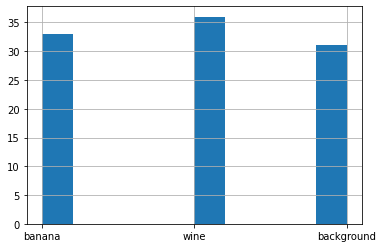

In [13]:
metadata_df["class"].hist()

* Numero de medidas tomadas en sensor_d por experimento

<AxesSubplot:>

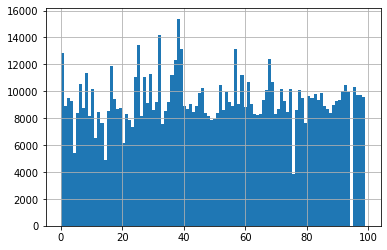

In [14]:
# Frecuencia de datos en sensor_d por experimento
dataset_df["id"].hist(bins=len(metadata_df))

* ¿Qué ids no tienen valores? En el caso de que exita lo descartamos.

In [15]:
for id in metadata_df["id"]:
    if id not in dataset_df["id"].unique():
        print("Descartando id =",id) 
        metadata_df.drop(id, inplace=True)

Descartando id = 95


* ¿Qué ids no tienen valores antes, durante y/o después de la inducción del objeto? 

In [16]:
dataset_df_antes, dataset_df_durante, dataset_df_despues = Preprocess.separar_dataset_segun_tiempo(dataset_df, 
                                                                                                   metadata_df)
Preprocess.get_missing_values(metadata_df, dfs=[dataset_df_antes, dataset_df_durante, dataset_df_despues])

[Series([], Name: id, dtype: int64),
 Series([], Name: id, dtype: int64),
 14    14
 76    76
 Name: id, dtype: int64]

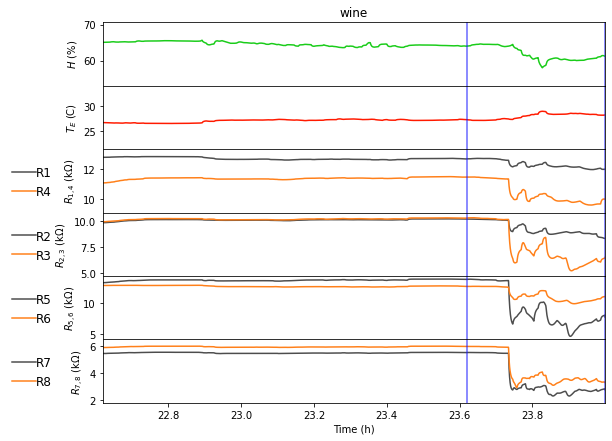

In [17]:
graficaInduccion(id=14, metadata=metadata_df.values, dataset=dataset_df.values)

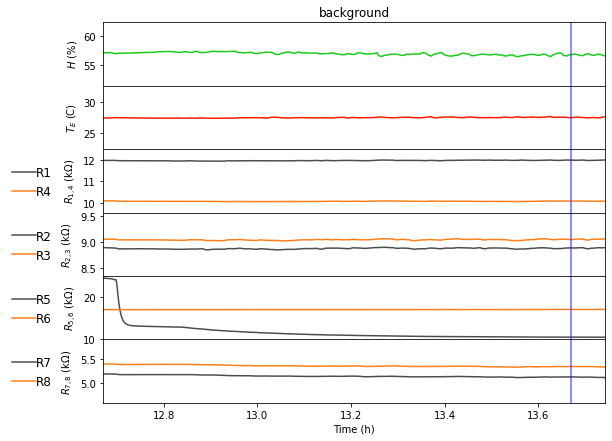

In [18]:
graficaInduccion(id=76, metadata=metadata_df.values, dataset=dataset_df.values)

> Los experimentos con **ids 14 y 76** no tienen datos para después de la inducción. De momento serán descartados.

In [19]:
dataset_df_antes_clean = dataset_df_antes.loc[(dataset_df_antes.id!=76) & (dataset_df_antes.id!=14)]
dataset_df_durante_clean = dataset_df_durante.loc[(dataset_df_durante.id!=76) & (dataset_df_durante.id!=14)]
dataset_df_despues_clean = dataset_df_despues
dataset_df_clean = dataset_df.loc[(dataset_df.id!=76) & (dataset_df.id!=14)]
metadata_df_clean = metadata_df.loc[(metadata_df.id!=76) & (metadata_df.id!=14)]

* Gráficas para sensores, temperatura y humedad para cada clase.

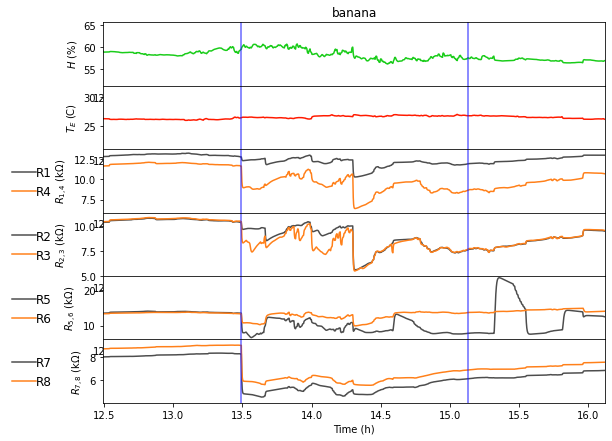

In [20]:
graficaInduccion(id=0, metadata=metadata_df.values, dataset=dataset_df.values)

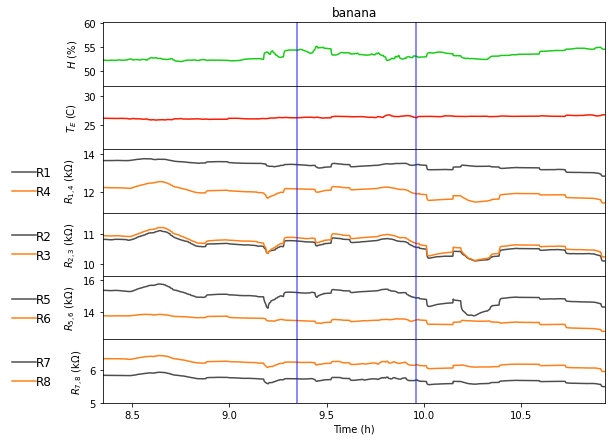

In [21]:
graficaInduccion(id=9, metadata=metadata_df.values, dataset=dataset_df.values)

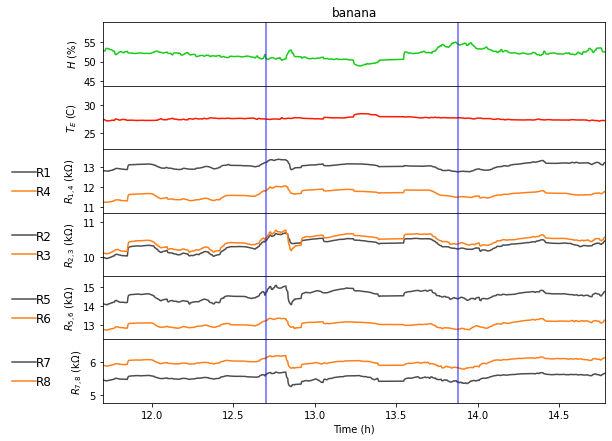

In [22]:
graficaInduccion(id=10, metadata=metadata_df.values, dataset=dataset_df.values)

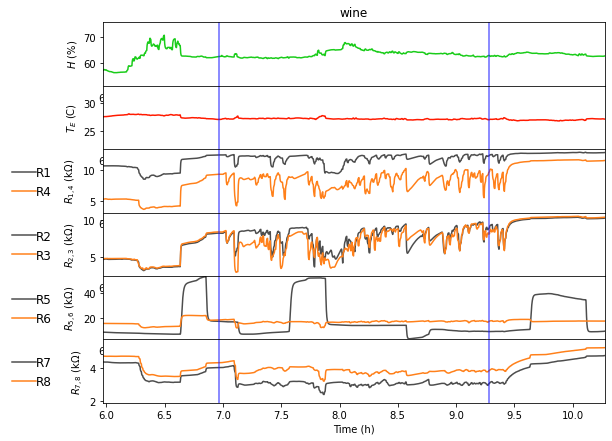

In [23]:
graficaInduccion(metadata=metadata_df.values, dataset=dataset_df.values)

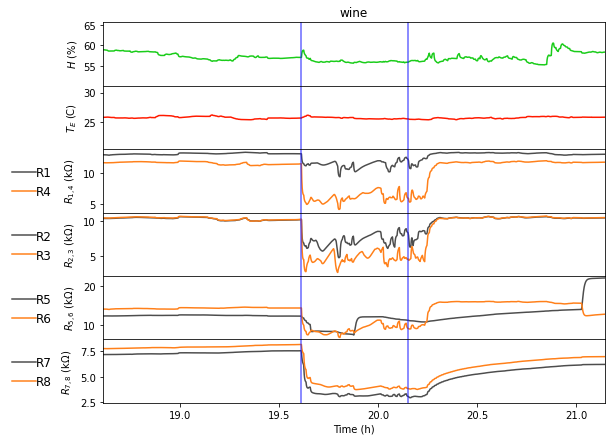

In [24]:
graficaInduccion(id=1, metadata=metadata_df.values, dataset=dataset_df.values)

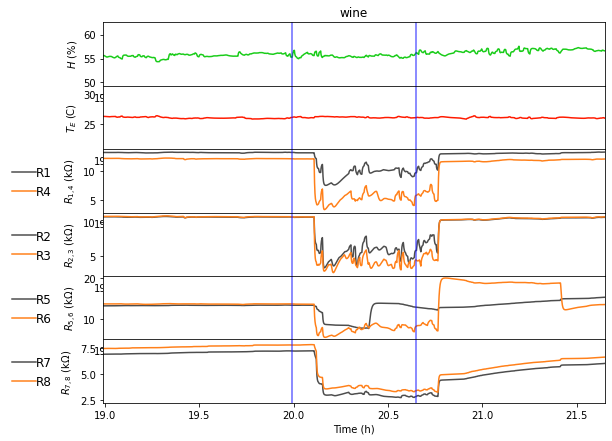

In [25]:
graficaInduccion(id=2, metadata=metadata_df.values, dataset=dataset_df.values)

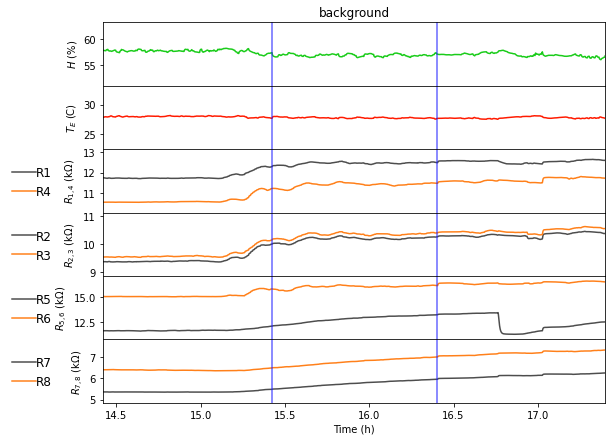

In [26]:
graficaInduccion(id=69, metadata=metadata_df.values, dataset=dataset_df.values)

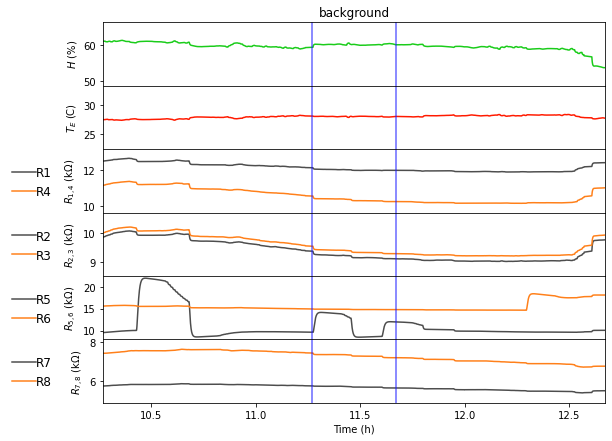

In [27]:
graficaInduccion(id=70, metadata=metadata_df.values, dataset=dataset_df.values)

* Grafica temperatura vs humedad media

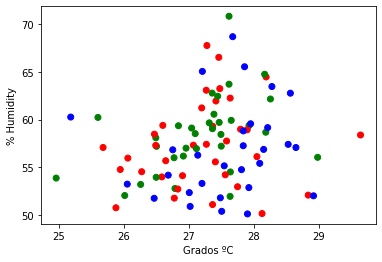

In [28]:
color = {'wine':'r', 'banana':'g', 'background':'b'}
metadata_color = [color[c] for c in metadata_df_clean["class"]]
Preprocess.plotTempHum(dataset_df_clean, c = metadata_color)

* Separación de ids de experimentos **por clase**

In [29]:
# Separacion de ids por clase 
dataset_ban, dataset_win , dataset_bac = Preprocess.split_class_id(metadata_df_clean)

* Cálculo de varianzas de sensores por experimento. Se obtiene diccionario de forma *(num_ids, num_sensores)*:

In [30]:
# Varianzas de cada etapa agrupado por experimento
vars_dataset = Preprocess.varianzas_sensores(dataset_df_clean)

vars_dataset_antes = Preprocess.varianzas_sensores(dataset_df_antes_clean)
vars_dataset_durante = Preprocess.varianzas_sensores(dataset_df_durante_clean)
vars_dataset_despues = Preprocess.varianzas_sensores(dataset_df_despues_clean)

* Cálculo de distancia entre maximo y minimo (global y durante el experimento)

In [31]:
max_dataset = Preprocess.max_sensores(dataset_df_clean)

max_dataset_antes = Preprocess.max_sensores(dataset_df_antes_clean)
max_dataset_durante= Preprocess.max_sensores(dataset_df_durante_clean)
max_dataset_despues= Preprocess.max_sensores(dataset_df_despues_clean)

min_dataset = Preprocess.min_sensores(dataset_df_clean)

min_dataset_antes = Preprocess.min_sensores(dataset_df_antes_clean)
min_dataset_durante= Preprocess.min_sensores(dataset_df_durante_clean)
min_dataset_despues= Preprocess.min_sensores(dataset_df_despues_clean)

ampl_dataset = {}
ampl_dataset_antes = {}
ampl_dataset_durante = {}
ampl_dataset_despues = {}
for i in max_dataset.keys():    
    ampl_dataset[i] = np.array(max_dataset[i]) - np.array(min_dataset[i])
    ampl_dataset_antes[i] = np.array(max_dataset_antes[i]) - np.array(min_dataset_antes[i])
    ampl_dataset_durante[i] = np.array(max_dataset_durante[i]) - np.array(min_dataset_durante[i])
    ampl_dataset_despues[i] = np.array(max_dataset_despues[i]) - np.array(min_dataset_despues[i])


## Elección de Modelo

* Antes de la división de atributos se **estandarizan**:

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

* Codificación de clases y estandarización de input de modelo.

In [68]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

y = metadata_df_clean["class"]

le = LabelEncoder()
le.fit(y)

X_ampl = np.array(list(ampl_dataset_durante.values()))

X_var = np.array(list(vars_dataset_durante.values()))

X_hum = np.array([i.mean() for _,i in dataset_df_clean["Humidity"].groupby(dataset_df_clean.id)]).reshape(-1,1)

X_temp = np.array([i.mean() for _,i in dataset_df_clean["Temp."].groupby(dataset_df_clean.id)]).reshape(-1,1) 


X = np.concatenate((X_var, X_ampl, X_hum, X_temp), axis=1)

# Estandarización y codificación.
X_scaled = scaler.fit_transform(X)
y_encode = le.transform(y)

* Se utiliza el módulo [*LazyPredic*](https://github.com/shankarpandala/lazypredict)  que permite declarar y comparar varios modelos populares de clasificación eficientemente. Se utilizarán varias opciones de separación de datos y se calculará qué modelo obtiene mejor "accuracy" de media.

In [69]:
from lazypredict.Supervised import LazyClassifier

# División entre datos de entreno y testeo
# Para poder obtener la misma proporción que el dataset original en el test utilzamos StratifiedShiffleSplit
models_sum = None
for i in range(30): # se repite 30 veces
    # Nueva división aleatoria
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
    for train_index, test_index in split.split(X, y_encode):
        X_train = X[train_index]
        y_train_encode = y_encode[train_index]
        X_test = X[test_index]
        y_test_encode = y_encode[test_index]
        # NUevo cálculo para todos los modelos
        clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
        models, predictions = clf.fit(X_train, X_test, y_train_encode, y_test_encode)
        # Lo añadimos a la cuenta general
        if models_sum is None: models_sum = models["Accuracy"]
        else: models_sum += models["Accuracy"]
            
models_sum.sort_values(ascending=False) / 10 # Calculamos media

100%|██████████| 30/30 [00:00<00:00, 45.68it/s]


Model
XGBClassifier                   0.74
LogisticRegression              0.72
ExtraTreesClassifier            0.72
BaggingClassifier               0.71
NearestCentroid                 0.71
RandomForestClassifier          0.71
LinearSVC                       0.71
LGBMClassifier                  0.70
CalibratedClassifierCV          0.69
KNeighborsClassifier            0.68
PassiveAggressiveClassifier     0.68
SVC                             0.68
DecisionTreeClassifier          0.67
RidgeClassifierCV               0.67
RidgeClassifier                 0.67
NuSVC                           0.66
BernoulliNB                     0.65
LinearDiscriminantAnalysis      0.65
GaussianNB                      0.64
SGDClassifier                   0.61
LabelSpreading                  0.61
Perceptron                      0.60
LabelPropagation                0.60
AdaBoostClassifier              0.60
QuadraticDiscriminantAnalysis   0.57
ExtraTreeClassifier             0.54
DummyClassifier                 

* Elegimos como modelos SGDClassifier, XGBClassifier, KNeighborsClassifier y RandomForest, y mostramos sus matrices de confusión.

In [81]:
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix

sgd = SGDClassifier()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier(verbosity = 0)

for name, model in zip(["SGDClassifier", "KNeighborsClassifier", "RandomForestClassifier", "XGBClassifier"],
                 [sgd, knn, rf, xgb]):
    preds = cross_val_predict(model, X, y_encode, cv=10)
    print("Matriz de confusión de", name)
    print(confusion_matrix(preds, y_encode))  

Matriz de confusión de SGDClassifier
[[10  4  3]
 [18 26 10]
 [ 1  3 22]]
Matriz de confusión de KNeighborsClassifier
[[19  7  3]
 [10 18 14]
 [ 0  8 18]]
Matriz de confusión de RandomForestClassifier
[[25  3  0]
 [ 4 20 10]
 [ 0 10 25]]
Matriz de confusión de XGBClassifier
[[24  5  0]
 [ 5 20  7]
 [ 0  8 28]]


* Redes neuronales obtienen resultados muy malos

In [73]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=X_train[0].shape))
model.add(keras.layers.Dense(40, activation="relu"))
model.add(keras.layers.Dense(3, activation="softmax"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 18)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 40)                760       
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 123       
Total params: 883
Trainable params: 883
Non-trainable params: 0
_________________________________________________________________


In [74]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=0.01),
              metrics=["accuracy"])

history = model.fit(X_train, y_train_encode, epochs=30, 
                    validation_data=(X_test, y_test_encode))

Epoch 1/30
3/3 [==============================] - 0s 22ms/step - loss: 35.3858 - accuracy: 0.3247 - val_loss: 152.8159 - val_accuracy: 0.3500
Epoch 2/30
3/3 [==============================] - 0s 6ms/step - loss: 9.2927 - accuracy: 0.3636 - val_loss: 73.6997 - val_accuracy: 0.4500
Epoch 3/30
3/3 [==============================] - 0s 7ms/step - loss: 1.2238 - accuracy: 0.3766 - val_loss: 73.4523 - val_accuracy: 0.4000
Epoch 4/30
3/3 [==============================] - 0s 8ms/step - loss: 1.1251 - accuracy: 0.3506 - val_loss: 76.3240 - val_accuracy: 0.4500
Epoch 5/30
3/3 [==============================] - 0s 7ms/step - loss: 1.1486 - accuracy: 0.5325 - val_loss: 73.9522 - val_accuracy: 0.4500
Epoch 6/30
3/3 [==============================] - 0s 7ms/step - loss: 0.9327 - accuracy: 0.4805 - val_loss: 74.6773 - val_accuracy: 0.5000
Epoch 7/30
3/3 [==============================] - 0s 8ms/step - loss: 0.9867 - accuracy: 0.4805 - val_loss: 74.4692 - val_accuracy: 0.3500
Epoch 8/30
3/3 [========

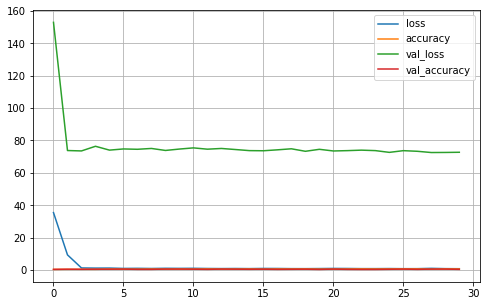

In [75]:
# Representación de curvas de aprendizaje
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

## Afinación de parámetros

* Utilizando Sci-kit Learn podemos buscar los hiperparámetros que mejores resultados obtengan. Elegimos XGBClassifier como modelo.

> * Mejores parámetros encontrados

In [76]:
from sklearn.model_selection import GridSearchCV

# XGB (https://docs.aws.amazon.com/sagemaker/latest/dg/xgboost-tuning.html )
params_xgb = {"n_estimators":[15,20,30,50],
            'reg_lambda':[2,1],
            'gamma':[0,0.3,0.2,0.1],
            'eta':[0.08, 0.07, 0.06, 0.05, 0.04],
            "max_depth":[3,5]}

xgb_grid_clf = GridSearchCV(xgb, params_xgb, scoring="accuracy")

xgb_search = xgb_grid_clf.fit(X, y)

xgb_search.best_params_

{'eta': 0.06,
 'gamma': 0.3,
 'max_depth': 5,
 'n_estimators': 15,
 'reg_lambda': 2}

> * Importancia de cada atributo de entrada

In [82]:
nom_attr = ["VarSensor"+str(i) for i in range(1,9)]+["AmpSensor"+str(i) for i in range(1,9)]+["Temp", "Hum"]
for name, att in zip(nom_attr, xgb_search.best_estimator_.feature_importances_):
    print(name, att)

VarSensor1 0.036748234
VarSensor2 0.19855176
VarSensor3 0.0
VarSensor4 0.044270378
VarSensor5 0.030137353
VarSensor6 0.02492837
VarSensor7 0.20285249
VarSensor8 0.0015682684
AmpSensor1 0.04491874
AmpSensor2 0.20274724
AmpSensor3 0.0
AmpSensor4 0.03743007
AmpSensor5 0.0
AmpSensor6 0.05681112
AmpSensor7 0.037561223
AmpSensor8 0.01875614
Temp 0.045028515
Hum 0.017690035


## Modelo Final 

In [83]:
xgb_best = xgb_search.best_estimator_

* Accuracy con cross-validation:

In [84]:
print(cross_val_score(xgb_best, X, y_encode, cv=5, scoring="accuracy"))

[0.65       0.5        0.84210526 0.84210526 0.84210526]
